9637
{'y': 50.0820515, 'x': 20.0325687, 'street_count': 4}


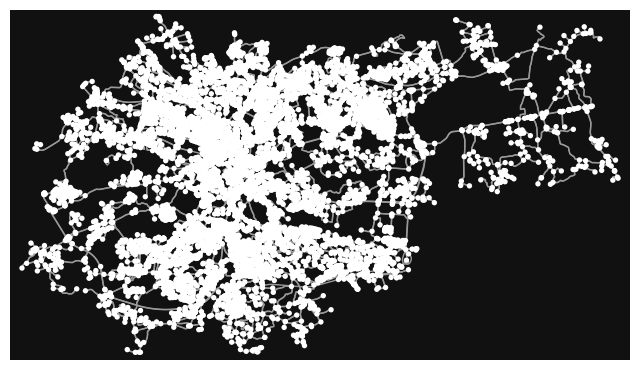

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import osmnx as ox

graph = ox.graph.graph_from_place("Kraków, Poland", network_type="drive")
print(len(graph.nodes()))
print(graph.nodes[13822575])
ox.plot_graph(graph)

In [ ]:
def get_adjacency_matrix(graph):
    adj_matrix = np.zeros((len(graph.nodes()), len(graph.nodes())), dtype=np.int8)
    nodes_mapped = {}
    for i, node in enumerate(graph.nodes()):
        nodes_mapped[node] = i

    for i, edge in enumerate(list(graph.edges())):
        node_number1 = nodes_mapped.get(edge[0])
        node_number2 = nodes_mapped.get(edge[1])
        adj_matrix[node_number1][node_number2] = 1

    return adj_matrix

get_adjacency_matrix(graph=graph)

In [ ]:
cities = [
    "Kraków, Poland",
    "Warszawa, Poland",
    "Wrocław, Poland",
    "Poznań, Poland",
    "Gdańsk, Poland",
    "Szczecin, Poland",
    "Łódź, Poland",
    "Lublin, Poland",
    "Katowice, Poland",
    "Bydgoszcz, Poland",
    "Białystok, Poland",
    "Rzeszów, Poland",
    "Toruń, Poland",
    "Olsztyn, Poland",
    "Zielona Góra, Poland",
    "Gorzów Wielkopolski, Poland",
    "Kielce, Poland",
    "Opole, Poland",
    "Częstochowa, Poland",
    "Radom, Poland"
]

In [ ]:
cities_map = {}
for city in cities: 
    graph = ox.graph.graph_from_place(city, network_type="drive")
    cities_map[city] = get_adjacency_matrix(graph)

In [ ]:
def get_adjacency_list(graph):
    adjacency = {}
    for edge in graph.edges():
        if edge[0] not in adjacency.keys():
            adjacency[edge[0]] = [edge[1]]
        else:
            adjacency[edge[0]].append(edge[1])

    return adjacency

In [ ]:
import numpy as np
import osmnx as ox


city = "Kraków, Poland"
graph = ox.graph.graph_from_place(city, network_type="drive")
ox.plot_graph(graph)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def get_grid(graph):
    max_x = max(graph.nodes[node]["x"] for node in graph.nodes())
    min_x = min(graph.nodes[node]["x"] for node in graph.nodes())
    max_y = max(graph.nodes[node]["y"] for node in graph.nodes())
    min_y = min(graph.nodes[node]["y"] for node in graph.nodes())

    print(max_x - min_x, max_y - min_y)
    print((max_x - min_x)/(max_y - min_y))
    print(len(graph.nodes()))


    grid_size_y = 150
    grid_size_x = int(grid_size_y * ((max_x - min_x)/(max_y - min_y)))
    matrix = np.zeros((grid_size_y, grid_size_x))

    for node in graph.nodes():
        x = int((graph.nodes[node]['x'] - min_x) / ((max_x - min_x)/grid_size_x))
        y = int((graph.nodes[node]['y'] - min_y) / ((max_y - min_y)/grid_size_y))
        
        x = min(x, grid_size_x - 1)
        y = min(y, grid_size_y - 1)

        matrix[y][x] = 1

    density = {}
    for i in range(int(matrix.max() + 1)):
        count = np.sum(matrix == i)
        density[i] = count
    print(density)

    plt.figure(figsize=(12,7))
    plt.imshow(matrix, cmap='gray', origin='lower')
    plt.title(f"Siatka punktów: {city}")
    plt.axis("off")
    plt.show()

    return matrix


In [ ]:
cities = ["Kraków, Poland", "Warszawa, Poland"]
cities_map = {}
for city in cities: 
    graph = ox.graph.graph_from_place(city, network_type="drive")
    cities_map[city] = get_grid(graph)